In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [20]:
#creates sample table of specified size
def create_sample_table (nrow, data):
    sample_table = np.empty(shape=(nrow, data.shape[1]))
    for c in range (0,sample_table.shape[1]):
        sample_table[:,c] = np.random.choice (data[:,c], nrow, replace = False)
    return sample_table

In [21]:
#get the MSE for one dataset, aggregate, and sample table size
def MSE_one_example (sample_table_nrows, data, aggregate, quantile):
    sample_table = create_sample_table (sample_table_nrows, data)
    MSE = 0
    for c in range (0,sample_table.shape[1]):
        if (quantile != 0):
            actual = aggregate(data[:,c], quantile)
            sample = aggregate(sample_table[:,c], quantile)
            MSE += (actual-sample)**2
        else:
            actual = aggregate(data[:,c])
            sample = aggregate(sample_table[:,c])
            MSE += (actual-sample)**2 
    MSE = MSE/sample_table.shape[1]
    return MSE

In [22]:
#takes in list of dataset sizes, list of aggregates, list of sample table sizes and plots MSE vs. sample table
#size for each dataset
#***dataset is ~N(0,1)
#@param dataset_sizes (list of tuples)
#@param aggregates (list of numpy aggregates on one column)
#@param sample_table_sizes (list of numbers representing ratios of sample table size to data table size)
def eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes):
    for dataset_size in dataset_sizes:
        data = np.random.normal(loc = 0, scale = 1, size=dataset_size)
        for aggregate in aggregates:
            if (aggregate == np.quantile):
                for i in [.1, .25, .5, .75]:
                    aggregate_mse = []
                    for sample_table_ratio in sample_table_sizes:
                        aggregate_mse.append(MSE_one_example (round(sample_table_ratio*data.shape[0]), data, aggregate, quantile = i))
                    print ("***New Example***")
                    print ("dataset size: ")
                    print(dataset_size)
                    print ("aggregate: ")
                    print(aggregate)
                    print ("quantile: ")
                    print (i)
                    print ("sample table sizes: ")
                    print(sample_table_sizes)
                    print ("MSE values: ")
                    print(aggregate_mse)
                    plt.plot (sample_table_sizes, aggregate_mse)
                    plt.pause(0.05)
                    print ("********")
            else:
                aggregate_mse = []
                for sample_table_ratio in sample_table_sizes:
                    aggregate_mse.append(MSE_one_example (round(sample_table_ratio*data.shape[0]), data, aggregate, quantile = 0))
                print ("***New Example***")
                print ("dataset size: ")
                print(dataset_size)
                print ("aggregate: ")
                print(aggregate)
                print ("sample table sizes: ")
                print(sample_table_sizes)
                print ("MSE values: ")
                print(aggregate_mse)
                plt.plot (sample_table_sizes, aggregate_mse)
                plt.pause(0.05)
                print ("********")
    plt.show()

In [23]:
#Test on some examples
dataset_sizes = [(100, 100), (250, 250), (500, 500), (1000, 1000), (2500, 2500), (5000, 5000)]
aggregates = [np.mean, np.std, np.amax, np.quantile]
sample_table_sizes = [.01, .05, .1, .25, .5, .75, .9]

***New Example***
dataset size: 
(100, 100)
aggregate: 
<function mean at 0x104d9a2f0>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.8724509649522154, 0.17597709930588046, 0.10852275960655126, 0.027371478091583787, 0.010689174959541923, 0.004151301975012077, 0.0012075663688500067]


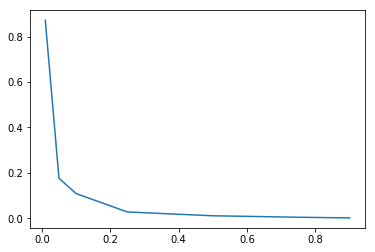

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function std at 0x104d9a378>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.9893833138890442, 0.11188974783941295, 0.048326073039606905, 0.013659582863408617, 0.004833965126206483, 0.0015920937665578627, 0.0007260194009111951]


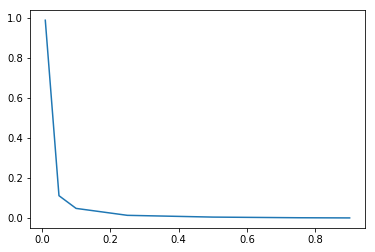

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function amax at 0x104d99d90>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[6.9785000034720905, 2.081787157208225, 1.0584871319347882, 0.3776653769696096, 0.10535873155968592, 0.06127009004818918, 0.00826721138984536]


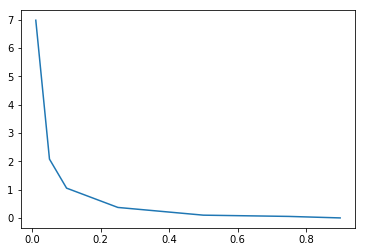

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.5949776951190797, 0.38091044942956637, 0.2693351648170291, 0.0897716064168386, 0.03041794204054089, 0.015515151718945266, 0.009370290909605596]


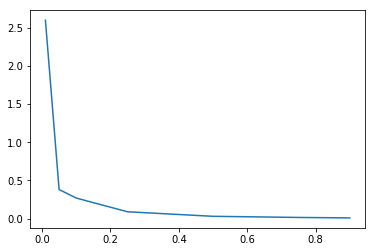

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.6140601830893357, 0.2986279737280966, 0.1840033293415899, 0.057685735530867664, 0.023882507472603887, 0.007617419888485398, 0.0018765218333325851]


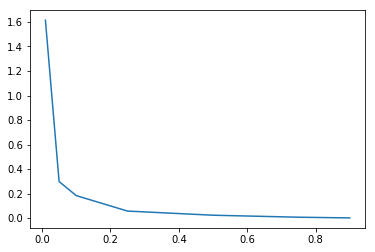

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.1249096010269788, 0.3380376977912197, 0.14432368252429073, 0.04105087181170866, 0.016385286113424026, 0.004301712108325391, 0.0017992611248085376]


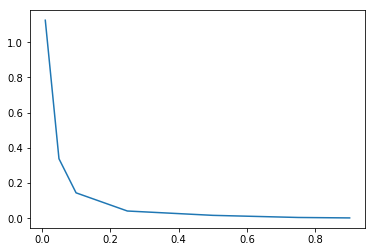

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.0647879888623357, 0.3490638492027787, 0.1435961094382926, 0.06789085931506862, 0.02206109391178915, 0.00919496735458458, 0.003230465800322984]


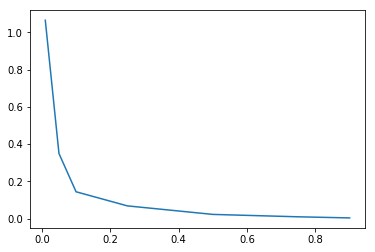

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function mean at 0x104d9a2f0>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.49386307725036066, 0.08119472224001219, 0.030799868707369796, 0.013259735821389378, 0.0046651283070500045, 0.00131464213257301, 0.00042501178695821977]


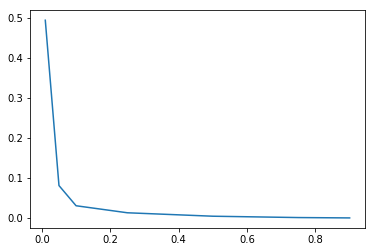

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function std at 0x104d9a378>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.3584501694784512, 0.047270052061332224, 0.02009287400691658, 0.0055990655655289165, 0.002344267312612777, 0.0006477559726160994, 0.00019933410292985007]


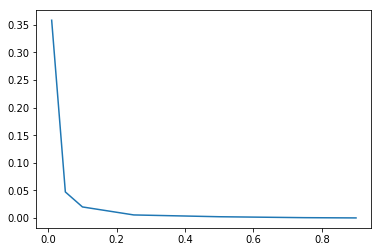

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function amax at 0x104d99d90>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[6.036327944563761, 1.6471614642655337, 1.0799544320817434, 0.5742989031729138, 0.1641887023240811, 0.07095344162401705, 0.04887661488946073]


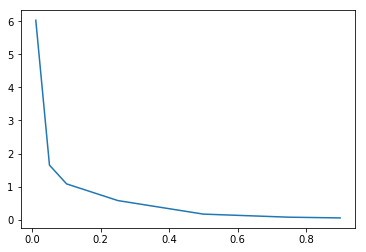

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.1746575581167777, 0.23323062810796397, 0.09472838726613511, 0.035873416966133505, 0.011941794262521172, 0.004152585411192444, 0.001691536106685143]


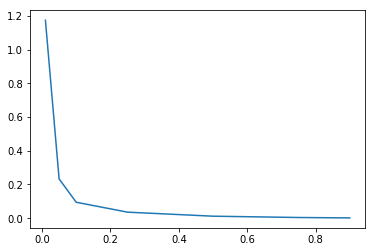

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.6418778521761926, 0.13630434077535644, 0.05686307272715475, 0.0230683118793883, 0.007961810362065962, 0.0021766197576066127, 0.0009889473726840646]


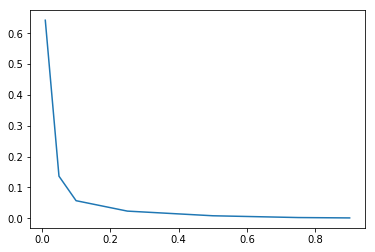

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.48162074849581, 0.09058098775032426, 0.05631188418249017, 0.0167566215303192, 0.007182867275240008, 0.002658158290889046, 0.0009301444170431911]


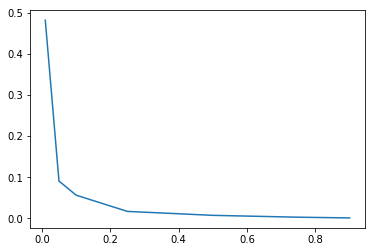

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.6657174663070201, 0.13630994618170056, 0.06121853285655016, 0.02270754797753404, 0.009049713330955247, 0.0032826480629346206, 0.0011578538900004075]


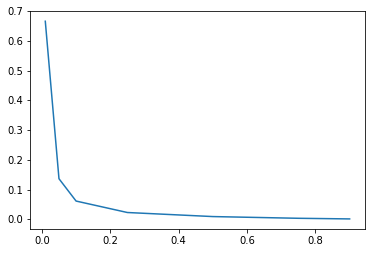

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function mean at 0x104d9a2f0>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.1751809059060256, 0.0385140694807373, 0.01729713046711271, 0.006968638748588279, 0.0021138760580089446, 0.0006576795236549607, 0.00023164134777828126]


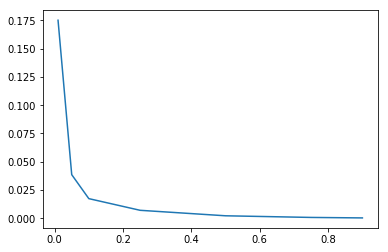

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function std at 0x104d9a378>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.1163356154447267, 0.02036545334072234, 0.009424748826065359, 0.0027895872216979214, 0.0010976693656058944, 0.00034132842084265603, 0.00012418258577813747]


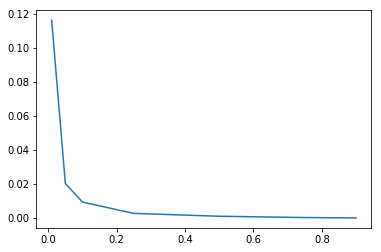

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function amax at 0x104d99d90>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3.932662916919455, 1.5023227058830393, 0.8538411367617018, 0.3971272909460159, 0.15172205875037223, 0.04169962356975739, 0.013831493753339285]


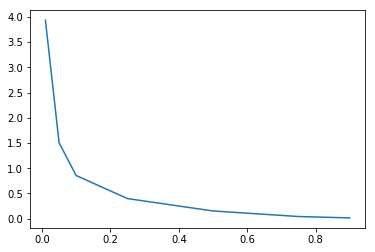

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.4437469255920923, 0.11205049749266202, 0.0502646278669523, 0.01783049175578056, 0.006355020008913833, 0.002313061129630214, 0.0007249868652059176]


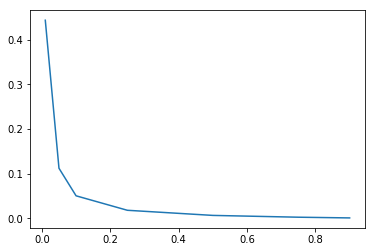

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.34119991723344767, 0.06973123745494729, 0.03447108988131684, 0.010782197190922506, 0.0035492345959397087, 0.0013239038371676468, 0.0005142543639702353]


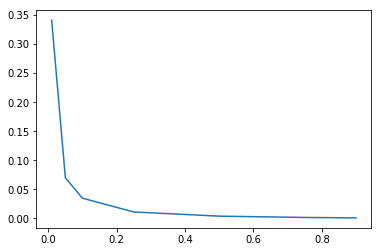

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.29128935622635377, 0.059397637640285814, 0.02768582421819248, 0.009710500849395043, 0.003166053366528821, 0.001217458090575086, 0.00035840015304909313]


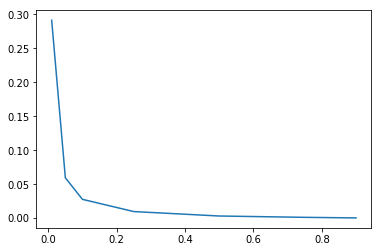

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.3521039622829962, 0.07304205789822005, 0.03311176645841959, 0.012056139977206852, 0.0036087269894370345, 0.001308284492646852, 0.0004732772855344744]


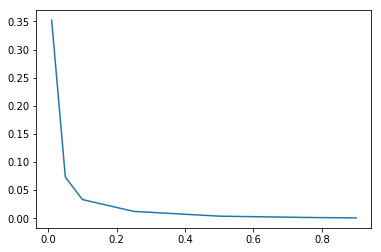

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function mean at 0x104d9a2f0>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.11121323454385629, 0.01880834697794943, 0.009014740552231323, 0.0029242432795690966, 0.0008990657552696291, 0.00032380286059860013, 0.00011184204005873436]


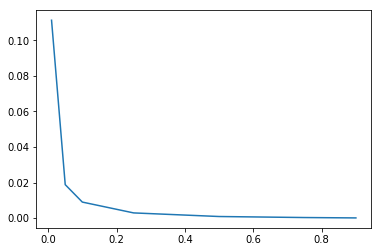

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function std at 0x104d9a378>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.055292819205018794, 0.009906681391537848, 0.004435170882235392, 0.001570391718215349, 0.0005250217447327498, 0.00014425380157642706, 5.610959062670083e-05]


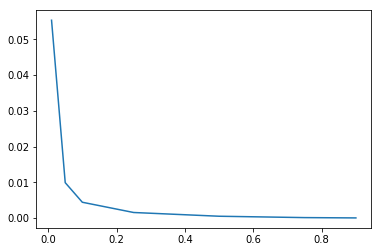

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function amax at 0x104d99d90>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3.415305196990616, 1.3045729444170986, 0.753914961441267, 0.3701678961956315, 0.14449736552530806, 0.0414304212750584, 0.021428581880560082]


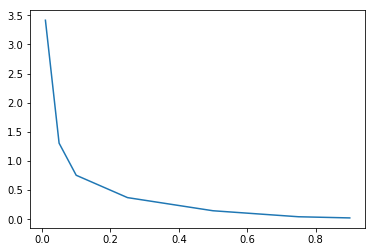

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.28470349201415757, 0.05599727695998056, 0.025255813821059885, 0.009442909278254245, 0.003197624058430114, 0.0011748270582856313, 0.000359774034511778]


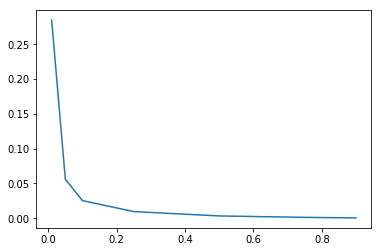

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.1711890827281555, 0.03430318545212583, 0.017062106377543535, 0.005602916141288274, 0.0019974235038656752, 0.0006209979558105729, 0.00024307403972735798]


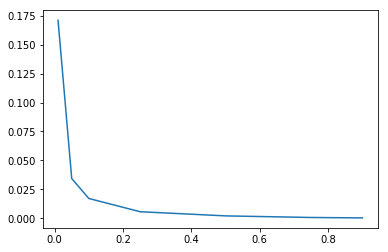

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.13400555893987545, 0.030622978251433175, 0.013340058741490602, 0.005052666832630118, 0.0017113069752947361, 0.0005626868220782587, 0.00020239899749918333]


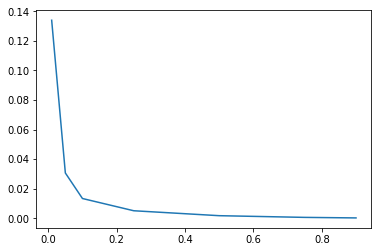

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.16933308464021588, 0.033925228811185794, 0.016117206823708104, 0.006238612385006815, 0.0018591350306358676, 0.0006646611619143138, 0.00023135927148780375]


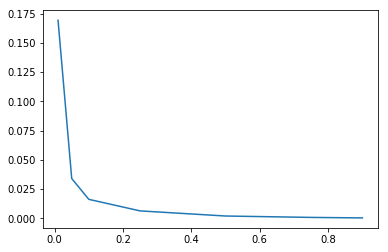

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function mean at 0x104d9a2f0>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.04207657714627359, 0.007959573560911594, 0.003571411826786181, 0.0012347979472085993, 0.00040773523670064265, 0.00013989950142888704, 4.502409192126489e-05]


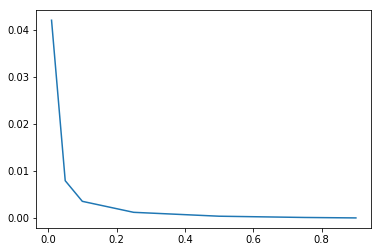

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function std at 0x104d9a378>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.021242805635095816, 0.0037563676159285036, 0.0017825219989491756, 0.0005898031254420103, 0.00019934529965607735, 6.831928172075201e-05, 2.1791868710709127e-05]


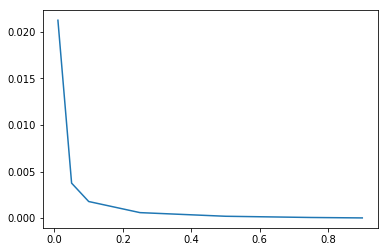

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function amax at 0x104d99d90>
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.6957061946727983, 1.0646486913207713, 0.6717698797978326, 0.2937094614724734, 0.11737173161604948, 0.04305067657411656, 0.016662717307135]


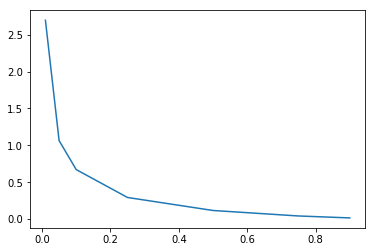

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.10411412427858271, 0.022128742425722246, 0.010800043813383179, 0.0035953416434488274, 0.0011639368725203457, 0.00042791669221944043, 0.0001496215780434309]


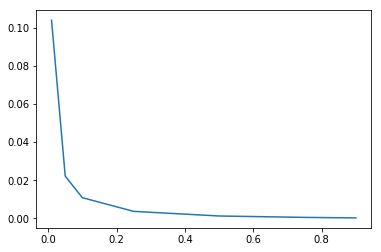

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x104e8cc80>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.06765493682101291, 0.014459868600621152, 0.006681193213682361, 0.002281234940963213, 0.0007656862458027915, 0.00026844007654509546, 9.479833306254458e-05]


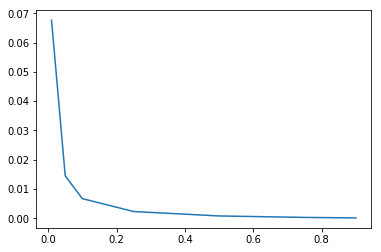

********


KeyboardInterrupt: 

In [24]:
eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes)

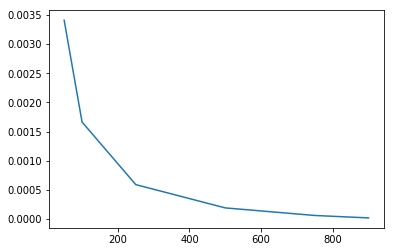

In [34]:
#test on categorical dataset.  Cat1 = 0:.25, Cat2 = .25:.5, Cat3 = . .5:.75, Cat4 =.75:1 

#Save results
sum_one_category_MSE = []

sample_table = create_sample_table (900, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)

sample_table = create_sample_table (750, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)

sample_table = create_sample_table (500, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)


sample_table = create_sample_table (250, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)


sample_table = create_sample_table (100, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)


sample_table = create_sample_table (50, data_categorical)
MSE = 0
for c in range (0,sample_table.shape[1]):
    num_Cat1_sample = 0
    num_Cat1_actual = 0
    for i in range (0, sample_table.shape[0]):
        if (sample_table[i,c] <= .25):
            num_Cat1_sample += 1
    for i in range (0, data_categorical.shape[0]):
        if (data_categorical[i,c] <= .25):
            num_Cat1_actual += 1
    sample = num_Cat1_sample/sample_table.shape[0]
    actual = num_Cat1_actual/data_categorical.shape[0]
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
sum_one_category_MSE.append(MSE)
   
plt.plot ([900, 750, 500, 250, 100, 50], sum_one_category_MSE)   
   
   

In [35]:
#show effect of outliers  - it's minimal to none when they're distributed like this
data_outliers = np.random.normal(loc = 0, scale = 1, size=(1000,1000))
for c in range (0, data_outliers.shape[1]):
    for r in range (0, data_outliers.shape[0]):
        if (r%200 == 0):
            data_outliers[r, c] += 100

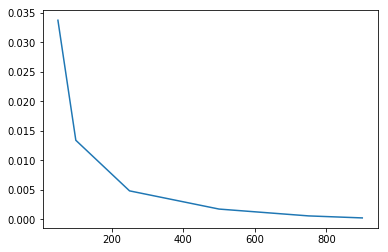

In [36]:
#Save results
outliers_MSE = []

sample_table = create_sample_table (900, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

sample_table = create_sample_table (750, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

sample_table = create_sample_table (500, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

sample_table = create_sample_table (250, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

sample_table = create_sample_table (100, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

sample_table = create_sample_table (50, data_outliers)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
outliers_MSE.append(MSE)

plt.plot ([900, 750, 500, 250, 100, 50], outliers_MSE)   

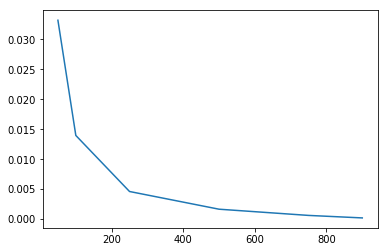

In [13]:
#compare outliers to no outliers
data = np.random.normal(loc = 0, scale = 1, size=(1000,1000))

#Save results
MSE_vals = []

sample_table = create_sample_table (900, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (750, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (500, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (250, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (100, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (50, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

plt.plot ([900, 750, 500, 250, 100, 50], MSE_vals)   

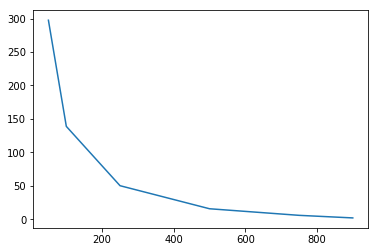

In [37]:
##compare high stdev to low stdev outliers
data = np.random.normal(loc = 0, scale = 100, size=(1000,1000))

#Save results
MSE_vals = []

sample_table = create_sample_table (900, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (750, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (500, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (250, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (100, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

sample_table = create_sample_table (50, data)
MSE = 0
for c in range (0,sample_table.shape[1]):
    actual = np.quantile(data_outliers[:,c], .5)
    sample = np.quantile(sample_table[:,c], .5)
    MSE += (actual-sample)**2
MSE = MSE/sample_table.shape[1]
MSE_vals.append(MSE)

plt.plot ([900, 750, 500, 250, 100, 50], MSE_vals)   

In [25]:
#can't provide guaruntees/confidence withotu knowing underlyign distirbution - here stdev scales error

In [56]:
#new summary alg https://pdfs.semanticscholar.org/3593/8dc843cb7ce95be5007ec40e3967ab6bfae8.pdf
X = np.random.randint (0, 5, (1,10))[0]
H = []
k = 100
p = .5
tau = p*len(X)
for x in X:
    contains_x = False
    for e_i in H:
        if (e_i[0] == x):
            e_i[1] += 1
            contains_x = True
            break
    if (contains_x == False):     
        if (len(H) < k):
            if (len(H)==0):
                H.insert (0, [x,1])
            else:
                #insert x maintaining sorted order
                index = len(H)-1
                for i in (0,len(H)):
                    print (i)
                    print (H)
                    if (H[i][0] > x):
                        index = i
                        break
                H.insert (index, [x,1])
        elif (x < H[1][0]):
            N_1_H = np.sum([entry[1] for entry in H])
            if (N_1_H < tau):
                H[len(H)-2][1] = H[len(H)-2][1] + H[len(H)-1][1]
                del H[length(H)-1]
                
                #insert (x,1)
                index = len(H)-1
                for i in (0,len(H)):
                    if (H[i][0] > x):
                        index = i
                        break
                print(H)
                H.insert (index, [x,1])
        else:
            for i in (0,len(H-1)):
                if (H[len(H-1)-i][0]<x):
                    H[len(H-1)-i][1] += 1
    N_2_H = np.sum([entry[1] for entry in H[1:]])
    if(N_2_H>=tau):
        del H[0]
print ("quantile approximation")
print (H)

0
[[1, 1]]
0
[[0, 1], [1, 1]]
2
[[0, 1], [1, 1]]


IndexError: list index out of range

In [52]:
X[0]

array([2, 0, 2, 0, 4, 3, 0, 4, 1, 2])